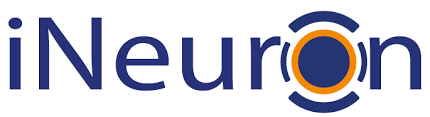

# ML Logistic Regression Practical Implementation on Algerian Forest Fire Prediction Dataset

**Submitted By :- Ambarish Singh**


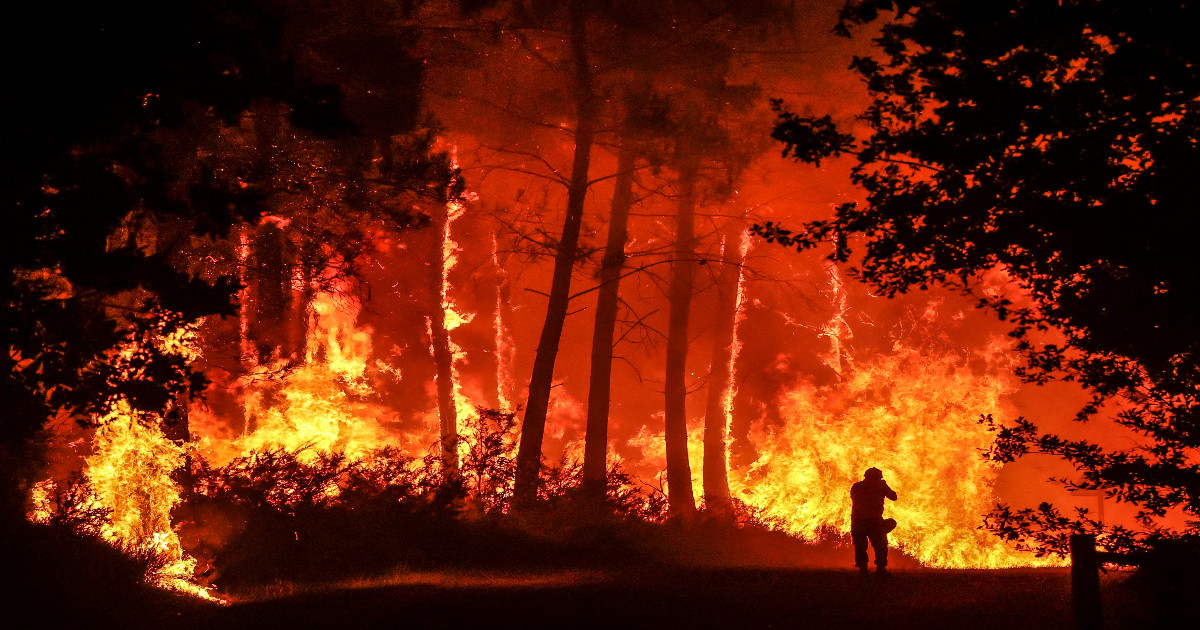

### EDA and Feature Engineering

1. Data Profiling
2. Data Cleaning
3. Statistical Analysis
4. Graphical Analysis
5. Data Scaling

### Logistic Regression Implementation

1. Logistic Regression on Original Dataset

2. Performance metrics for above model

3. Creating an imbalanced dataset from original dataset

4. Balancing the imbalanced Dataset

5. Logistic Regression on above dataset

6. Performance Metrics for above Dataset

7. Compairing the performance of Original balanced dataset and the balanced dataset that we create from an imbalanced one
   
   



### What is Logistic Regression?

Ans : Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

### Advantages of Logisitic Regression

1. It is very simple and easy to implement.

2. The output is more informative than other classification algorithms

3. It expresses the relationship between independent and dependent variables

4. Very effective with linearly seperable data

### Disadvantages of Logisitic Regression

1. Not effective with data which are not linearly seperable

2. Not as powerful as other classification models

3. Multiclass classifications are much easier to do with other algorithms than logisitic regression

4. It can only predict categorical outcomes 

## <span style='color:Green '> Importing required libraries</span>

In [136]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

## <span style='color:green '>Reading the Dataset</span>

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header = 1)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

### <span style='color:Green '>Info about dataset and its attributes</span>


1. The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for each region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (classes)
5. The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

### Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

In [3]:
# index 122, 123 need to be removed from dataset
df.iloc[121:].head(4) 

day  month  year  Temperature   RH   Ws  Rain   \
121                             30     09  2012           25   78   14    1.4   
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    
124                             01     06  2012           32   71   12    0.7   

     FFMC  DMC   DC  ISI  BUI  FWI    Classes    
121    45  1.9  7.5  0.2  2.4  0.1  not fire     
122   NaN  NaN  NaN  NaN  NaN  NaN          NaN  
123  FFMC  DMC   DC  ISI  BUI  FWI    Classes    
124  57.1  2.5  8.2  0.6  2.8  0.2  not fire

## <span style='color:green '>Shape Of The Dataset </span>

In [4]:
df.shape

(246, 14)

## <span style='color:green '>Dropping the unwanted rows and column  </span>

In [5]:
## dropping rows having region name and headder
df.drop([122,123],inplace=True)  ## droping row 122,123 from dataset
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

df.iloc[121:].head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1   
122  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6  2.8  0.2   
123  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6  2.9  0.2   
124  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3  2.6  0.1   
125  04    06  2012          30  64  14     0  79.4  5.2  15.4  2.2  5.6    1   

       Classes    
121  not fire     
122  not fire     
123  not fire     
124  not fire     
125  not fire

## <span style='color:Green '> Shape of the data sfter dropping the column </span>


In [130]:
df.shape

(244, 14)

### <span style='color:Green '>Creating Region feature</span>

In [7]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
df.loc[:122,'Region']=0
df.loc[122:, 'Region']=1

df.iloc[120:].head(8)

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
120  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3    3  0.1   
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1   
122  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6  2.8  0.2   
123  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6  2.9  0.2   
124  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3  2.6  0.1   
125  04    06  2012          30  64  14     0  79.4  5.2  15.4  2.2  5.6    1   
126  05    06  2012          32  60  14   0.2  77.1    6  17.6  1.8  6.5  0.9   
127  06    06  2012          35  54  11   0.1  83.7  8.4  26.3  3.1  9.3  3.1   

       Classes    Region  
120  not fire        0.0  
121  not fire        0.0  
122  not fire        1.0  
123  not fire        1.0  
124  not fire        1.0  
125  not fire        1.0  
126  not fire        1.0  
127      fire        1.0

### <span style='color:green'>Datatypes and describe</span>

In [8]:
# here it is visible that all datatypes are in object 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [9]:
df.describe(include='all').T

count unique      top freq mean       std  min  25%  50%  75%  \
day            244     31       01    8  NaN       NaN  NaN  NaN  NaN  NaN   
month          244      4       07   62  NaN       NaN  NaN  NaN  NaN  NaN   
year           244      1     2012  244  NaN       NaN  NaN  NaN  NaN  NaN   
Temperature    244     19       35   29  NaN       NaN  NaN  NaN  NaN  NaN   
 RH            244     62       64   10  NaN       NaN  NaN  NaN  NaN  NaN   
 Ws            244     18       14   43  NaN       NaN  NaN  NaN  NaN  NaN   
Rain           244     39        0  133  NaN       NaN  NaN  NaN  NaN  NaN   
FFMC           244    173     88.9    8  NaN       NaN  NaN  NaN  NaN  NaN   
DMC            244    166      7.9    5  NaN       NaN  NaN  NaN  NaN  NaN   
DC             244    198        8    5  NaN       NaN  NaN  NaN  NaN  NaN   
ISI            244    106      1.1    8  NaN       NaN  NaN  NaN  NaN  NaN   
BUI            244    174        3    5  NaN       NaN  NaN  NaN  NaN  NaN   
FWI            244    127      0.4   12  NaN       NaN  NaN  NaN  NaN  NaN   
Classes        243      8  fire     131  NaN       NaN  NaN  NaN  NaN  NaN   
Region       244.0    NaN      NaN  NaN  0.5  0.501028  0.0  0.0  0.5  1.0   

             max  
day          NaN  
month        NaN  
year         NaN  
Temperature  NaN  
 RH          NaN  
 Ws          NaN  
Rain         NaN  
FFMC         NaN  
DMC          NaN  
DC           NaN  
ISI          NaN  
BUI          NaN  
FWI          NaN  
Classes      NaN  
Region       1.0

### <span style='color:green '>Data Cleaning</span>

In [10]:
# here it is visible that some columns have spaces in the names like RH, Ws
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [11]:
# stripping spaces from column names
df.columns= [col_name.strip() for col_name in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
## converting all feature values to string so that we can do data cleaning as shown below.
df=df.astype(str)

In [13]:
## somes values in colums also have space
for feature in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[feature]= df[feature].str.replace(" ","")

## <span style='color:Green '>Checking the unique data points of FWI feature</span>


In [14]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

### <span style='color:Green '>Here we got 'fire' data point in FWI column , so to remove this it is replaced by mode</span>
 

In [15]:
df[df['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [16]:
df['FWI'].mode()

0    0.4
dtype: object

In [17]:
df.loc[165,'FWI']='0.4'

In [18]:
### replacing nan value wit fire to make data equal to the info given in dataset 
df[df['Classes']== 'nan'].index
df.loc[165,'Classes']='fire'

In [19]:
### encoding classes feature
df['Classes']=df['Classes'].str.replace('notfire','0')
df['Classes']=df['Classes'].str.replace('fire','1')

In [20]:
### Dropping year feature as data is realted to year 2012.
df.drop('year', axis=1, inplace=True)

### <span style='color:green '>Changing datatype to Numerical from Object</span>

In [21]:
### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert={'day':'int64', 'month':'int64', 'Temperature':'int64', 'RH':'int64', 'Ws':'int64',
                  'Rain':'float64', 'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64',
                  'FWI':'float64', 'Classes':'int64', 'Region':'float64'}

df=df.astype(datatype_convert)
df.dtypes

day              int64
month            int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

### <span style='color:blue'>Observation</span>

* So, all the features are converted from categorical  to numerical datatypes

In [22]:
df.shape

(244, 14)

### <span style='color:green '>2.7 Checking Null values and Duplicates</span>

In [23]:
### checking for null values

df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [24]:
df[df.duplicated()]

Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

### <span style='color:blue'>Observation</span>

1. There is no null value in dataset.
2. Total 244 rowws and 15 columns is present.
3. There is no duplicate observation in dataset.

## <span style='color:Green '>Creating a Copy of dataframe from Original Dataframe</span>


In [25]:
data=df.copy()
data.head()

day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0     0.0  
1        0     0.0  
2        0     0.0  
3        0     0.0  
4        0     0.0

## <span style='color:Green '> Statistical Analysis </span>


In [26]:
data.describe().T

count       mean        std   min     25%    50%     75%    max
day          244.0  15.754098   8.825059   1.0   8.000  16.00  23.000   31.0
month        244.0   7.500000   1.112961   6.0   7.000   7.50   8.000    9.0
Temperature  244.0  32.172131   3.633843  22.0  30.000  32.00  35.000   42.0
RH           244.0  61.938525  14.884200  21.0  52.000  63.00  73.250   90.0
Ws           244.0  15.504098   2.810178   6.0  14.000  15.00  17.000   29.0
Rain         244.0   0.760656   1.999406   0.0   0.000   0.00   0.500   16.8
FFMC         244.0  77.887705  14.337571  28.6  72.075  83.50  88.300   96.0
DMC          244.0  14.673361  12.368039   0.7   5.800  11.30  20.750   65.9
DC           244.0  49.288484  47.619393   6.9  13.275  33.10  68.150  220.4
ISI          244.0   4.774180   4.175318   0.0   1.400   3.50   7.300   19.0
BUI          244.0  16.664754  14.204824   1.1   6.000  12.25  22.525   68.0
FWI          244.0   7.008197   7.437383   0.0   0.700   4.20  11.375   31.1
Classes      244.0   0.565574   0.496700   0.0   0.000   1.00   1.000    1.0
Region       244.0   0.500000   0.501028   0.0   0.000   0.50   1.000    1.0

### <span style='color:blue'>Observation</span>

No missing values is present in the dataset

In [27]:
data.cov()

day         month  Temperature          RH         Ws  \
day          7.788167e+01  4.605370e-16     3.071308   -9.747689   1.165621   
month        4.605370e-16  1.238683e+00    -0.238683   -0.627572  -0.129630   
Temperature  3.071308e+00 -2.386831e-01    13.204817  -35.396782  -2.840215   
RH          -9.747689e+00 -6.275720e-01   -35.396782  221.539415   9.874739   
Ws           1.165621e+00 -1.296296e-01    -2.840215    9.874739   7.897102   
Rain        -1.980908e+00  7.860082e-02    -2.374270    6.635431   0.956129   
FFMC         2.834676e+01  2.485597e-01    35.297598 -137.785533  -6.577727   
DMC          5.365433e+01  9.384774e-01    21.712423  -74.580245  -0.043306   
DC           2.218594e+02  6.766276e+00    64.113719 -156.174991  10.204060   
ISI          6.548769e+00  2.866255e-01     9.218043  -42.920524   0.178913   
BUI          6.483903e+01  1.356790e+00    23.512265  -73.700941   1.187799   
FWI          2.303207e+01  6.962963e-01    15.102287  -63.152169   0.606139   
Classes      8.845038e-01  1.234568e-02     0.935168   -3.216117  -0.092862   
Region       0.000000e+00  0.000000e+00     0.497942   -3.030864  -0.248971   

                  Rain        FFMC         DMC           DC        ISI  \
day          -1.980908   28.346758   53.654328   221.859379   6.548769   
month         0.078601    0.248560    0.938477     6.766276   0.286626   
Temperature  -2.374270   35.297598   21.712423    64.113719   9.218043   
RH            6.635431 -137.785533  -74.580245  -156.174991 -42.920524   
Ws            0.956129   -6.577727   -0.043306    10.204060   0.178913   
Rain          3.997623  -15.595918   -7.135415   -28.259196  -2.897687   
FFMC        -15.595918  205.565939  106.820535   344.048788  44.283138   
DMC          -7.135415  106.820535  152.968382   515.551947  34.831449   
DC          -28.259196  344.048788  515.551947  2267.606583  99.199508   
ISI          -2.897687   44.283138   34.831449    99.199508  17.433281   
BUI          -8.496825  120.090018  172.536341   637.129111  37.714477   
FWI          -4.800293   73.187426   80.480590   262.143165  28.198196   
Classes      -0.376833    5.484349    3.588791    11.994976   1.525363   
Region       -0.041152    1.613992    1.184156    -1.944053   0.561523   

                    BUI         FWI    Classes    Region  
day           64.839034   23.032065   0.884504  0.000000  
month          1.356790    0.696296   0.012346  0.000000  
Temperature   23.512265   15.102287   0.935168  0.497942  
RH           -73.700941  -63.152169  -3.216117 -3.030864  
Ws             1.187799    0.606139  -0.092862 -0.248971  
Rain          -8.496825   -4.800293  -0.376833 -0.041152  
FFMC         120.090018   73.187426   5.484349  1.613992  
DMC          172.536341   80.480590   3.588791  1.184156  
DC           637.129111  262.143165  11.994976 -1.944053  
ISI           37.714477   28.198196   1.525363  0.561523  
BUI          201.777024   90.628767   4.119605  0.621811  
FWI           90.628767   55.314665   2.636497  0.718107  
Classes        4.119605    2.636497   0.246711  0.041152  
Region         0.621811    0.718107   0.041152  0.251029

## <span style='color:Green '> Checking the distribution of the features  </span>


In [28]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### <span style='color:blue'>Observation</span>

* Rain, DMC, DC, FWI,ISI,BUI are rightly skewed(log normal distribution)

* There is no variance in the year attribute

## <span style='color:Green '> Multivariate Analysis</span>

<Figure size 1080x1080 with 0 Axes>

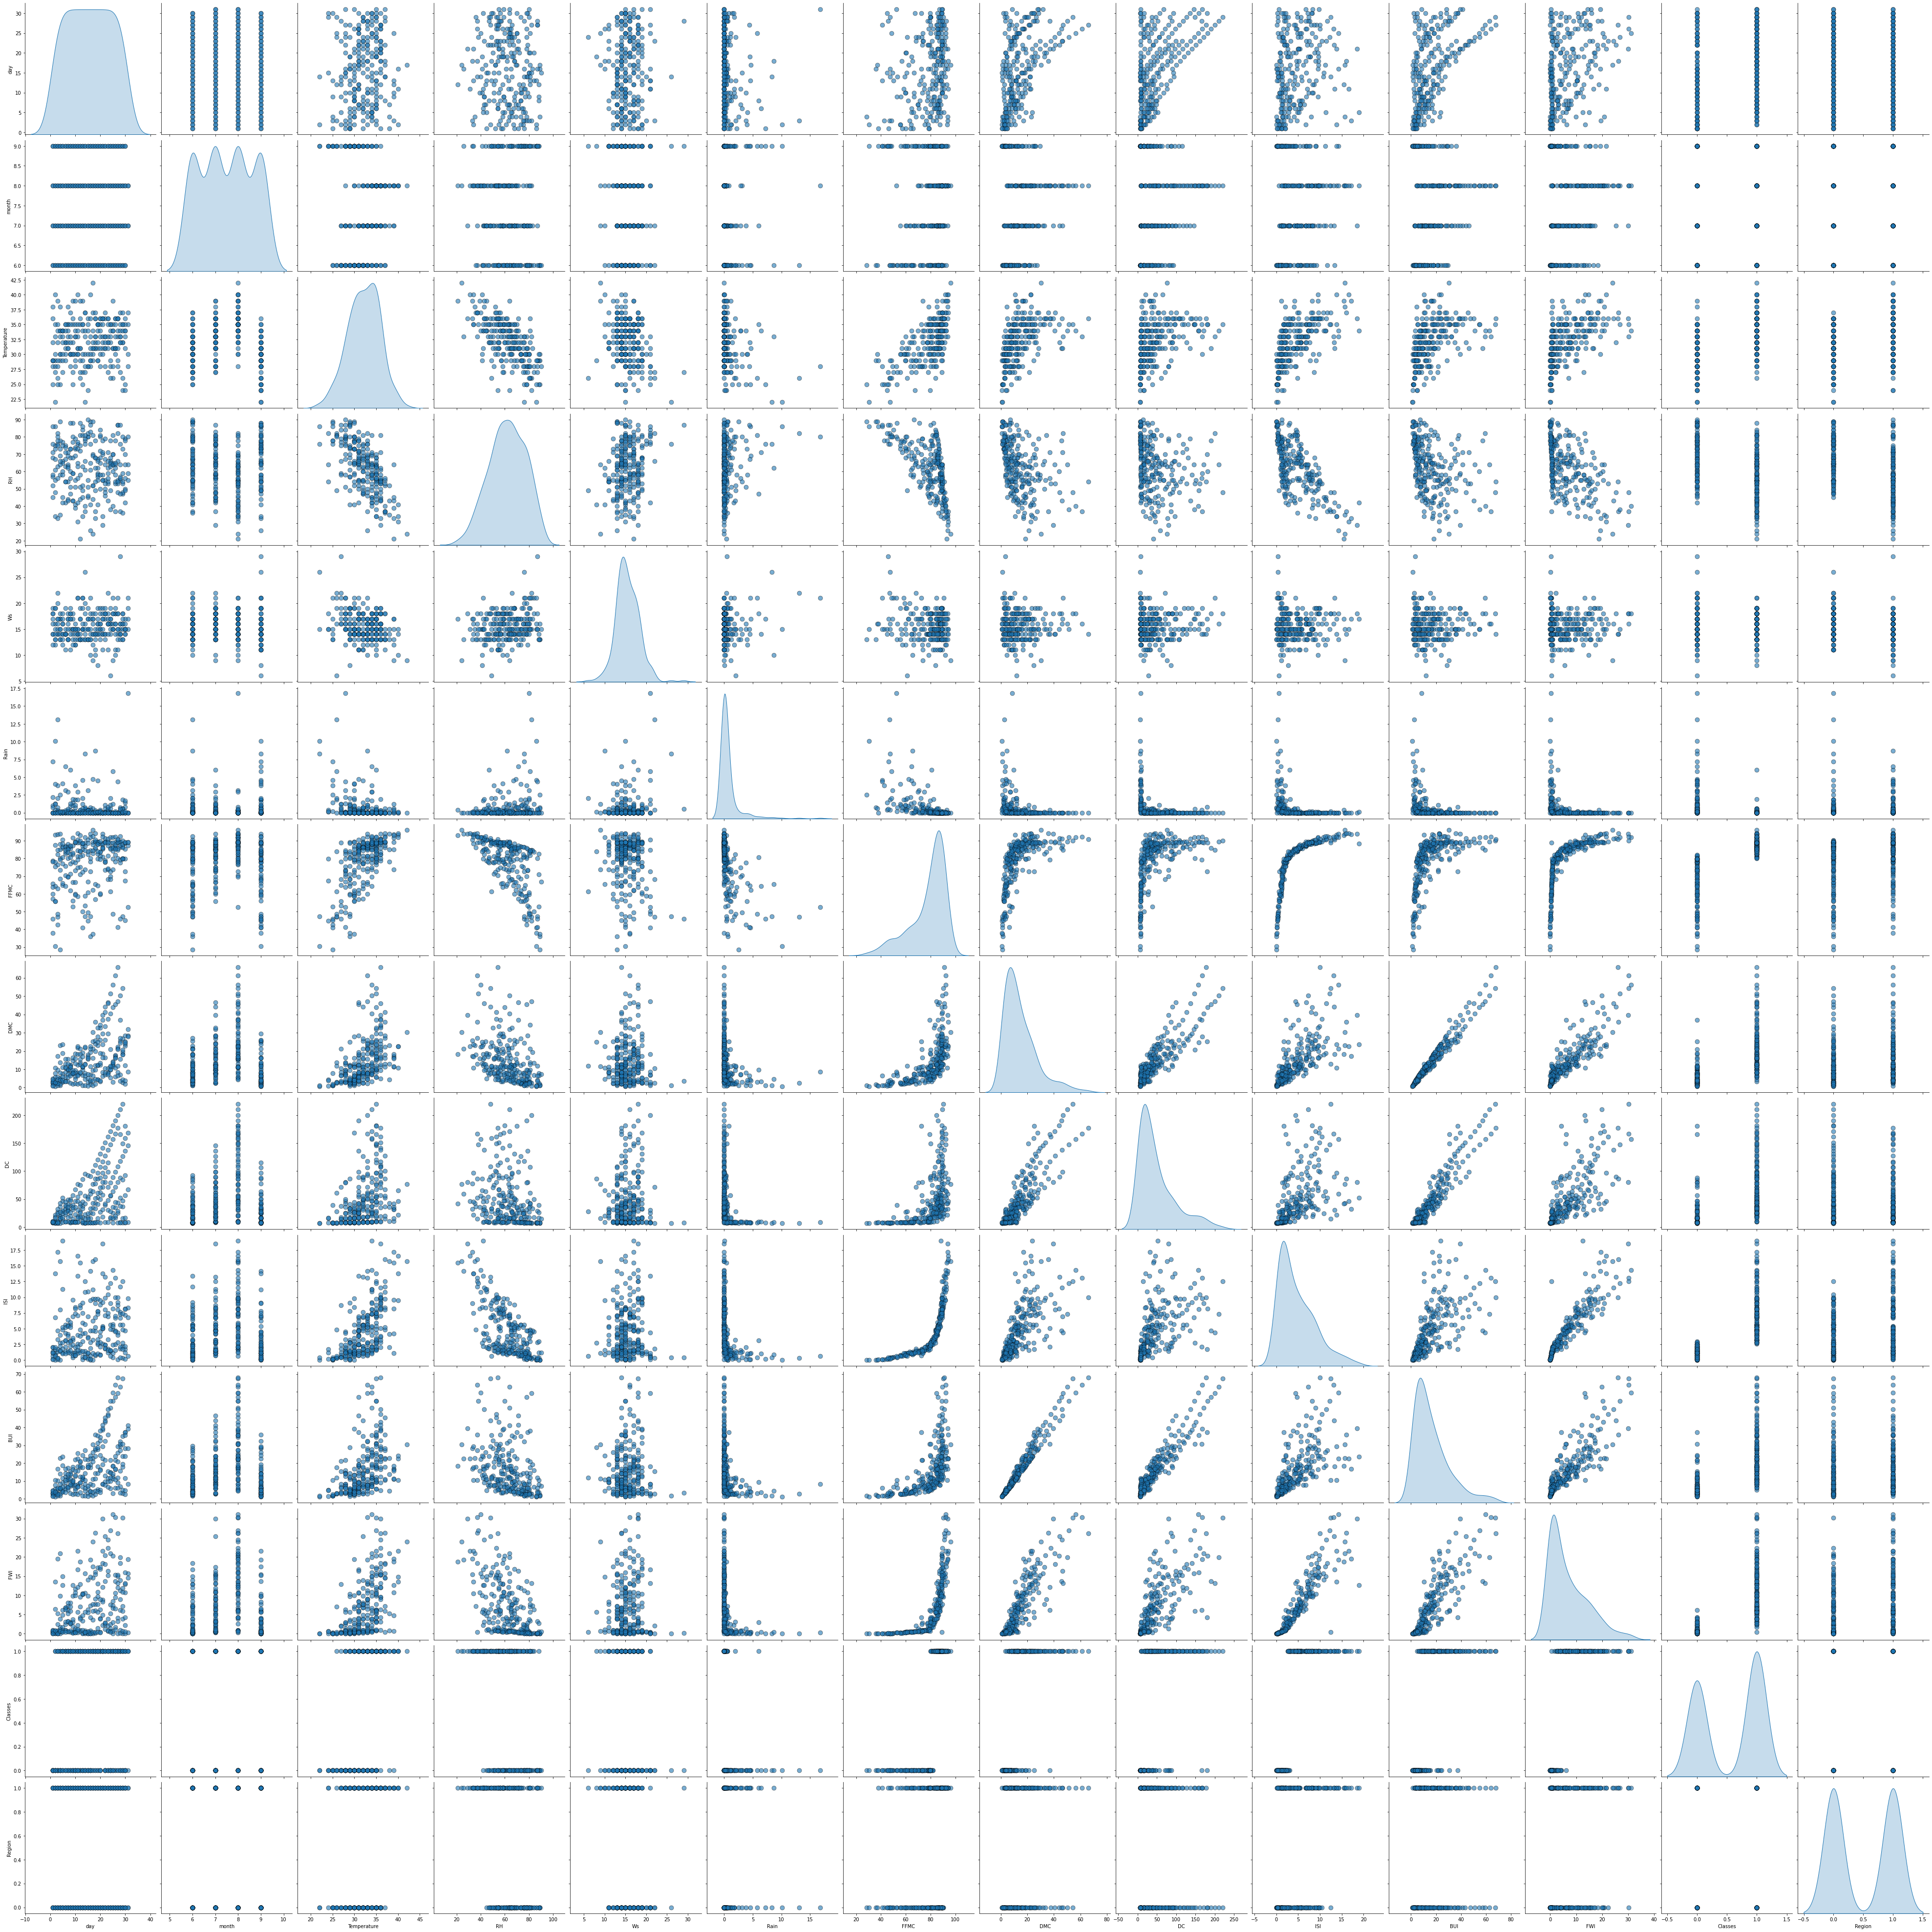

In [29]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(data,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

<AxesSubplot:>

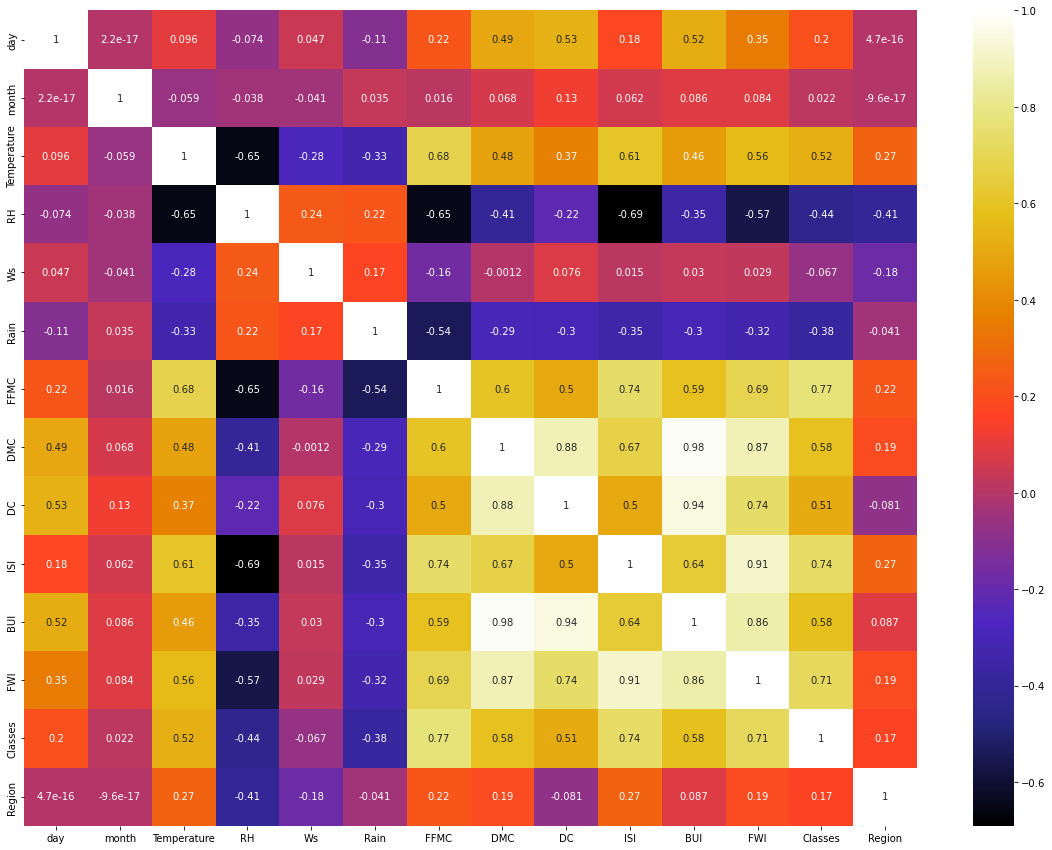

In [30]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),cmap="CMRmap", annot=True)

## <span style='color:Green '> Visualisation of Target Feature  </span>


In [31]:
data.Classes.value_counts()

1    138
0    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Classes'>

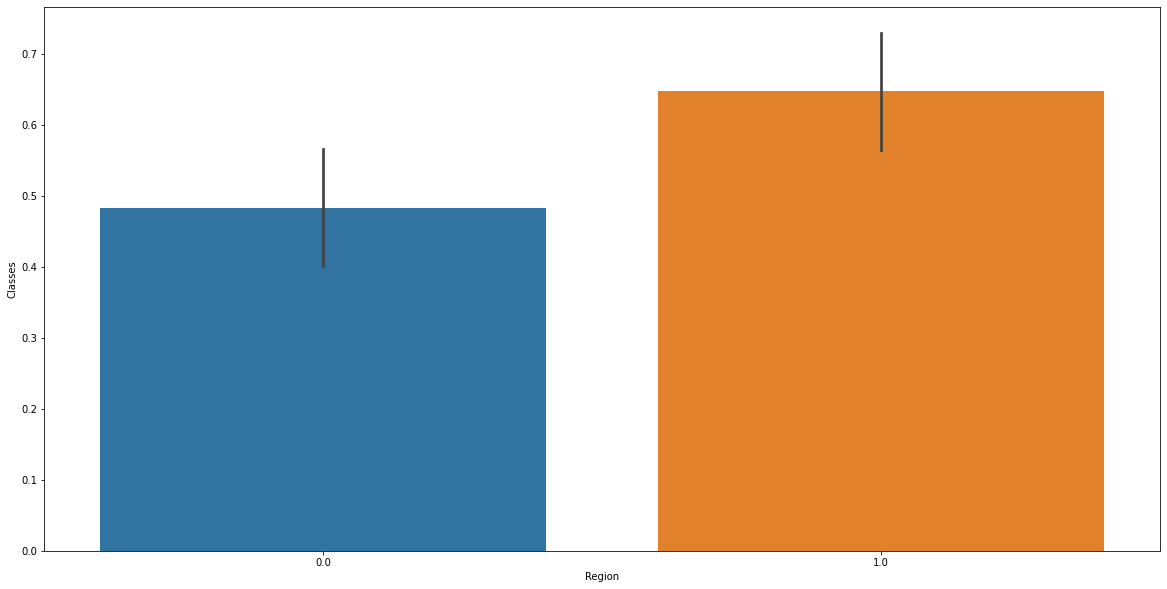

In [32]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Classes",data=data)

### <span style='color:blue'>Observation</span>

* Sidi-Bel Abbes region has most of the fire happen

## <span style='color:Green '>  Visualisation of Temperature Feature  </span>


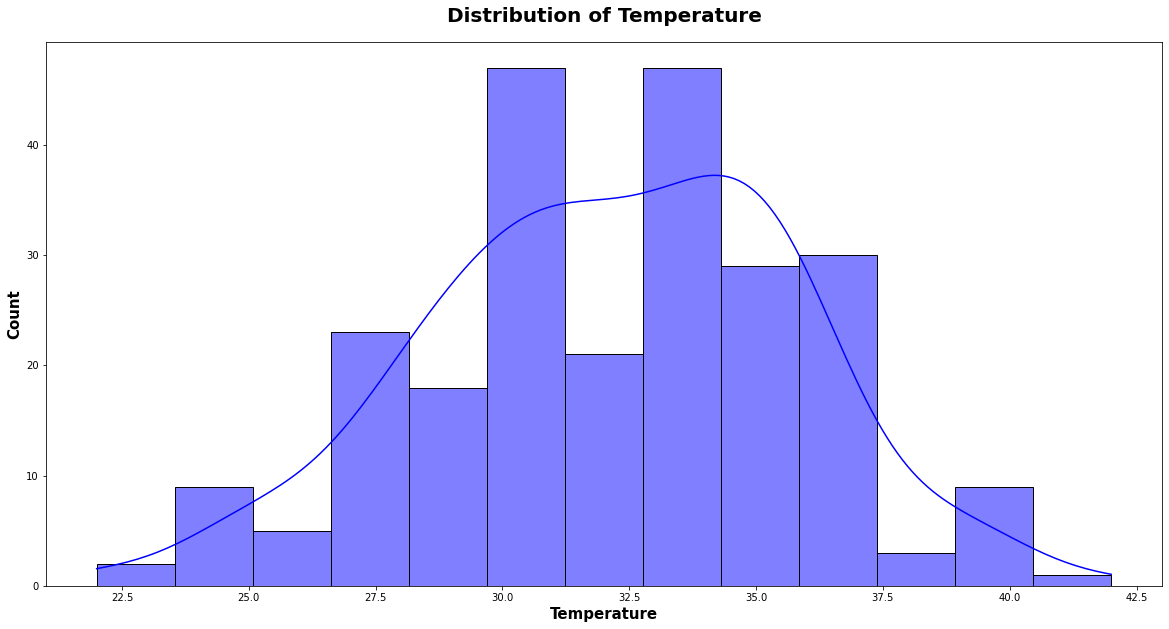

In [33]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=data.Temperature,color='b',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

### <span style='color:blue'>Observation</span>

* Temperature occur most of the time in range 32.5 to 35.0  

## <span style='color:Green '> Highest Temperature attained  </span>


In [34]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Classes",data=data)

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

### <span style='color:blue'>Observation</span>

* Highest temperature is 42,40,37

## <span style='color:Green '> Which region is mostly effected by rain </span>


In [35]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Rain",data=data)

<AxesSubplot:xlabel='Region', ylabel='Rain'>

### <span style='color:blue'>Observation</span>

* Bejaia is the region in which most of the time rain happens

## <span style='color:Green '> Which region is highly effected by Temperature  </span>


<AxesSubplot:xlabel='Region', ylabel='Temperature'>

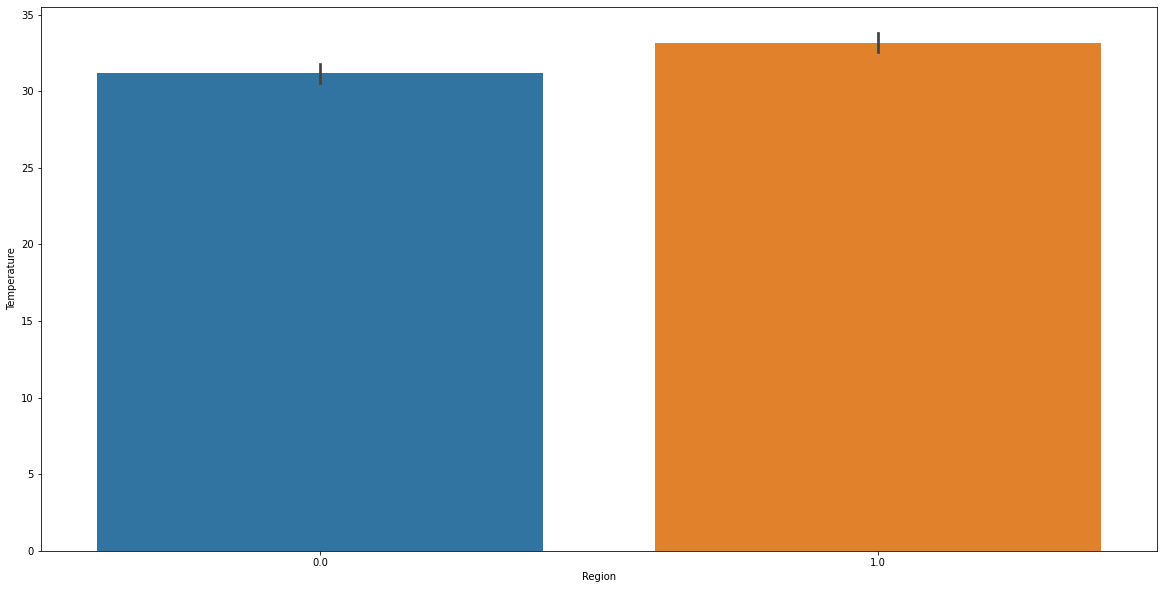

In [36]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Temperature",data=data)

### <span style='color:blue'>Observation</span>

* Sidi-Bel Abbes region mostly effected by Temperature

# <span style='color:Green '> Reg plot </span>


In [37]:
num_col=[feature for feature in data.columns if data[feature].dtype != 'O']
num_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

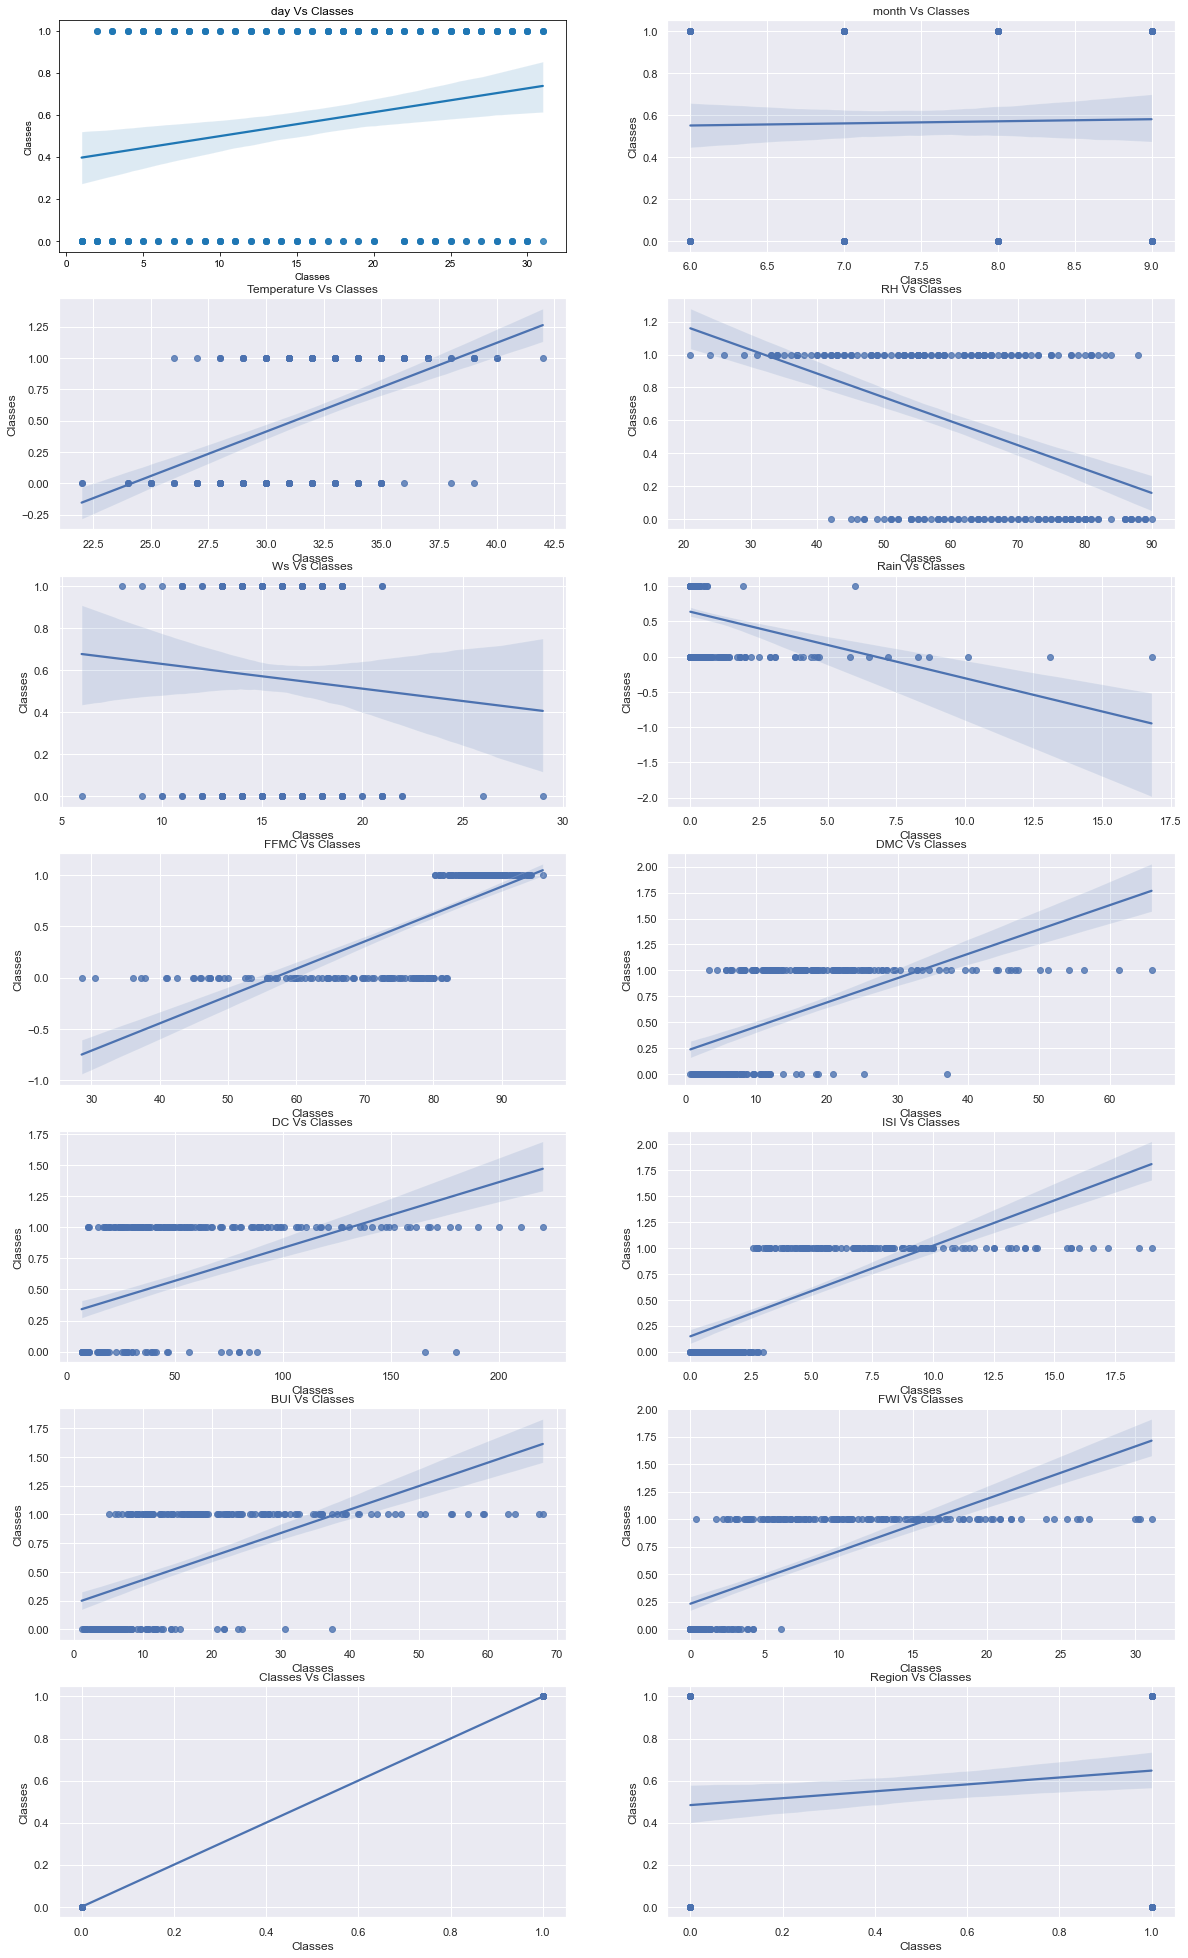

In [38]:
plt.figure(figsize=(20,40))
for i in enumerate(num_col):
    plt.subplot(8,2,i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=data,x=i[1],y='Classes')
    plt.xlabel('Classes')
    plt.title('{} Vs Classes'.format(i[1]))

## <span style='color:Green '> Boxplot to find outliers  </span>


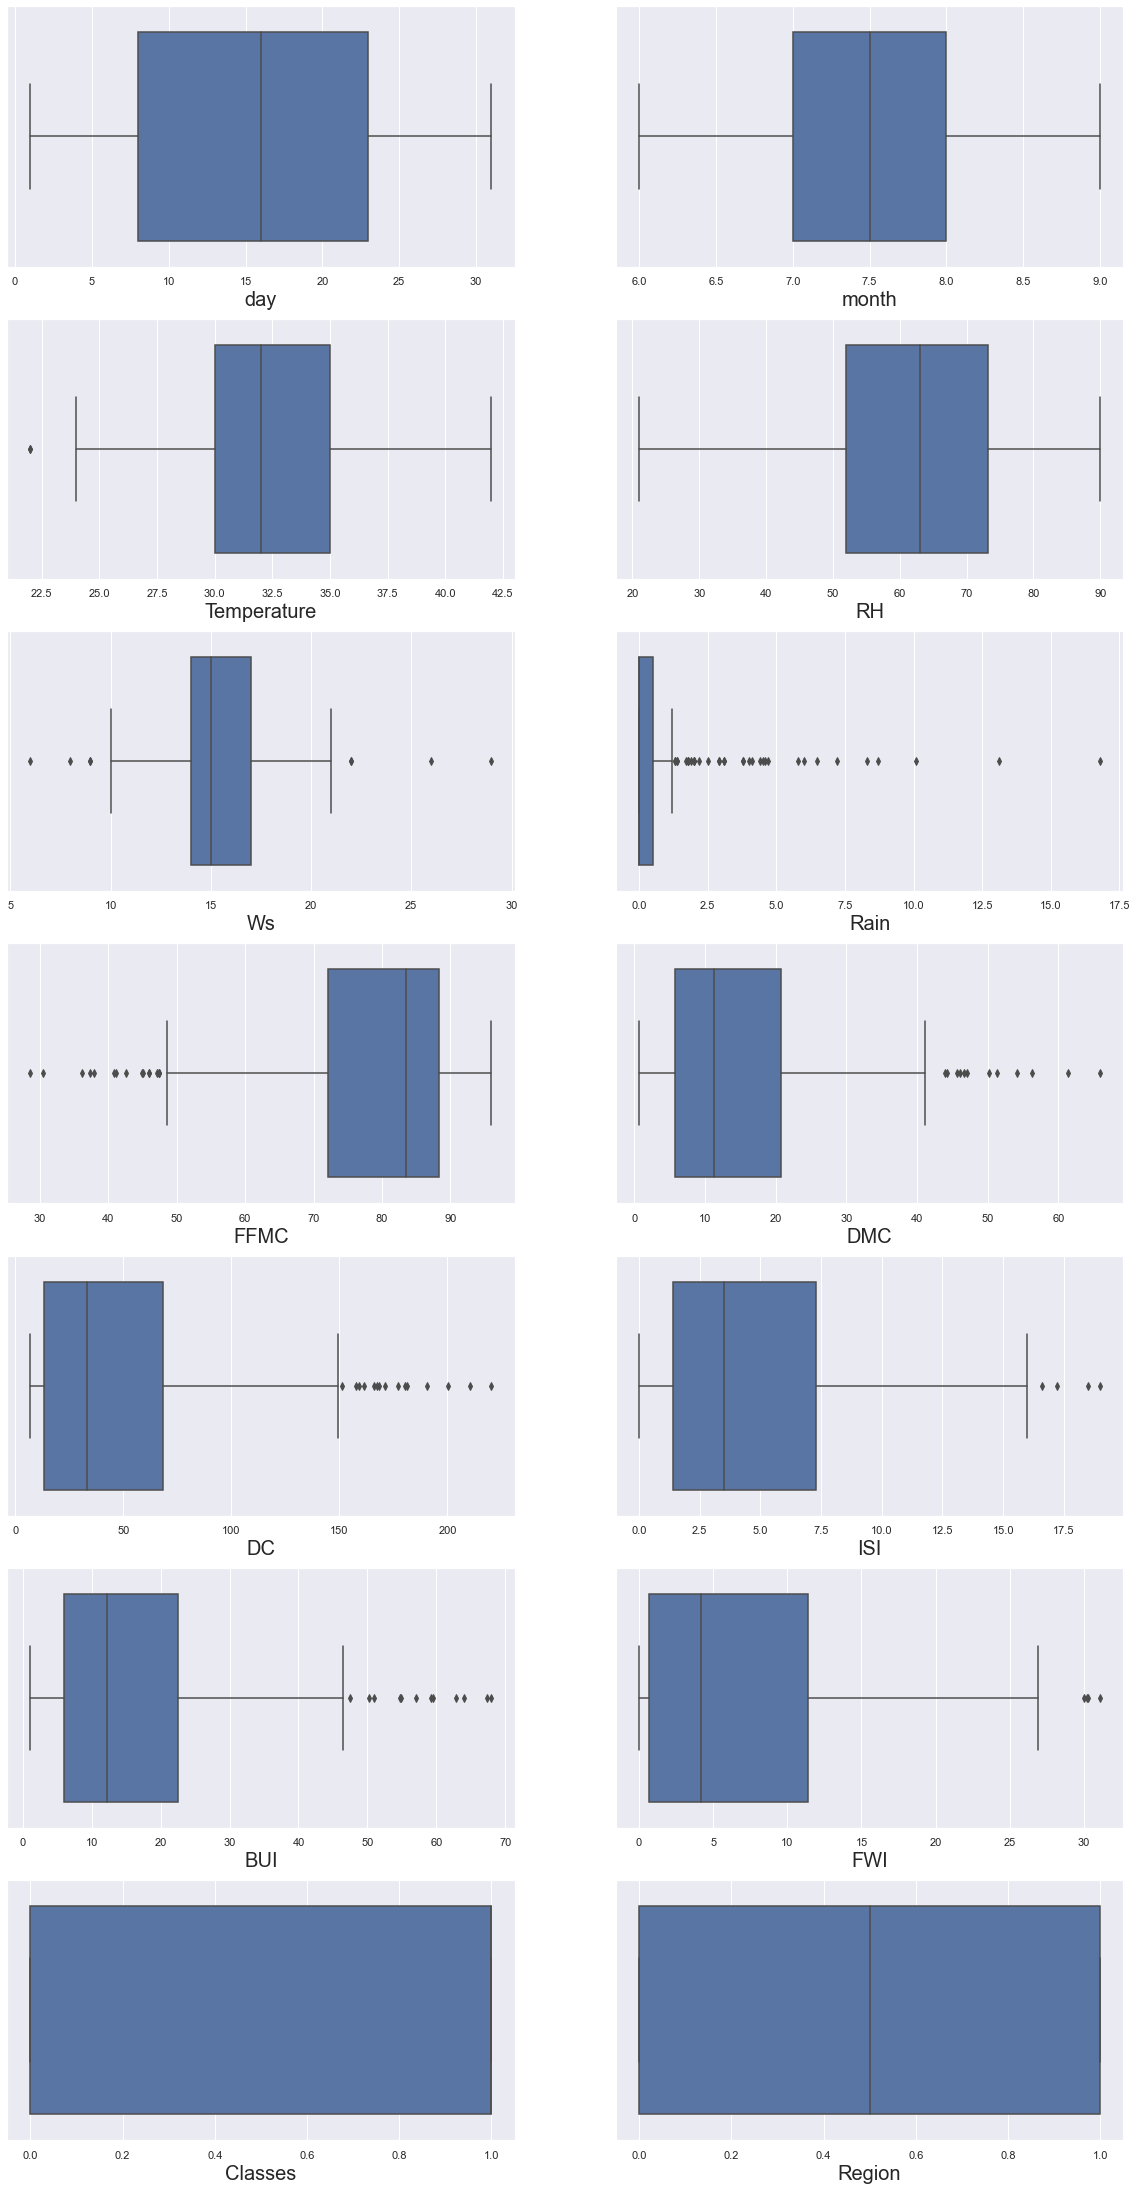

In [39]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### <span style='color:blue'>Observation</span> 

* Ws, Rain, FFMC, DMC BUI has many outliers

## <span style='color:Green '> Dropping the outliers </span>


In [40]:
def outliers_imputation_mild(data,column):
    IQR=data[column].quantile(0.75)-data[column].quantile(0.25)
    lower_fence=data[column].quantile(0.25)-(IQR*1.5)
    upper_fence=data[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    data.loc[data[column]<=lower_fence,column]=lower_fence
    data.loc[data[column]>=upper_fence,column]=upper_fence 

In [41]:
columns=data.columns

In [42]:
for col in columns:
    outliers_imputation_mild(data,col)

IQR: 15.0
Lower Fence day: -14.5
Upper Fence day: 45.5
____________________________________________
IQR: 1.0
Lower Fence month: 5.5
Upper Fence month: 9.5
____________________________________________
IQR: 5.0
Lower Fence Temperature: 22.5
Upper Fence Temperature: 42.5
____________________________________________
IQR: 21.25
Lower Fence RH: 20.125
Upper Fence RH: 105.125
____________________________________________
IQR: 3.0
Lower Fence Ws: 9.5
Upper Fence Ws: 21.5
____________________________________________
IQR: 0.5
Lower Fence Rain: -0.75
Upper Fence Rain: 1.25
____________________________________________
IQR: 16.224999999999994
Lower Fence FFMC: 47.73750000000001
Upper Fence FFMC: 112.63749999999999
____________________________________________
IQR: 14.95
Lower Fence DMC: -16.624999999999996
Upper Fence DMC: 43.175
____________________________________________
IQR: 54.87500000000001
Lower Fence DC: -69.03750000000002
Upper Fence DC: 150.46250000000003
___________________________________

## <span style='color:Green '>  Rechecking the outliers after dropping it  </span>


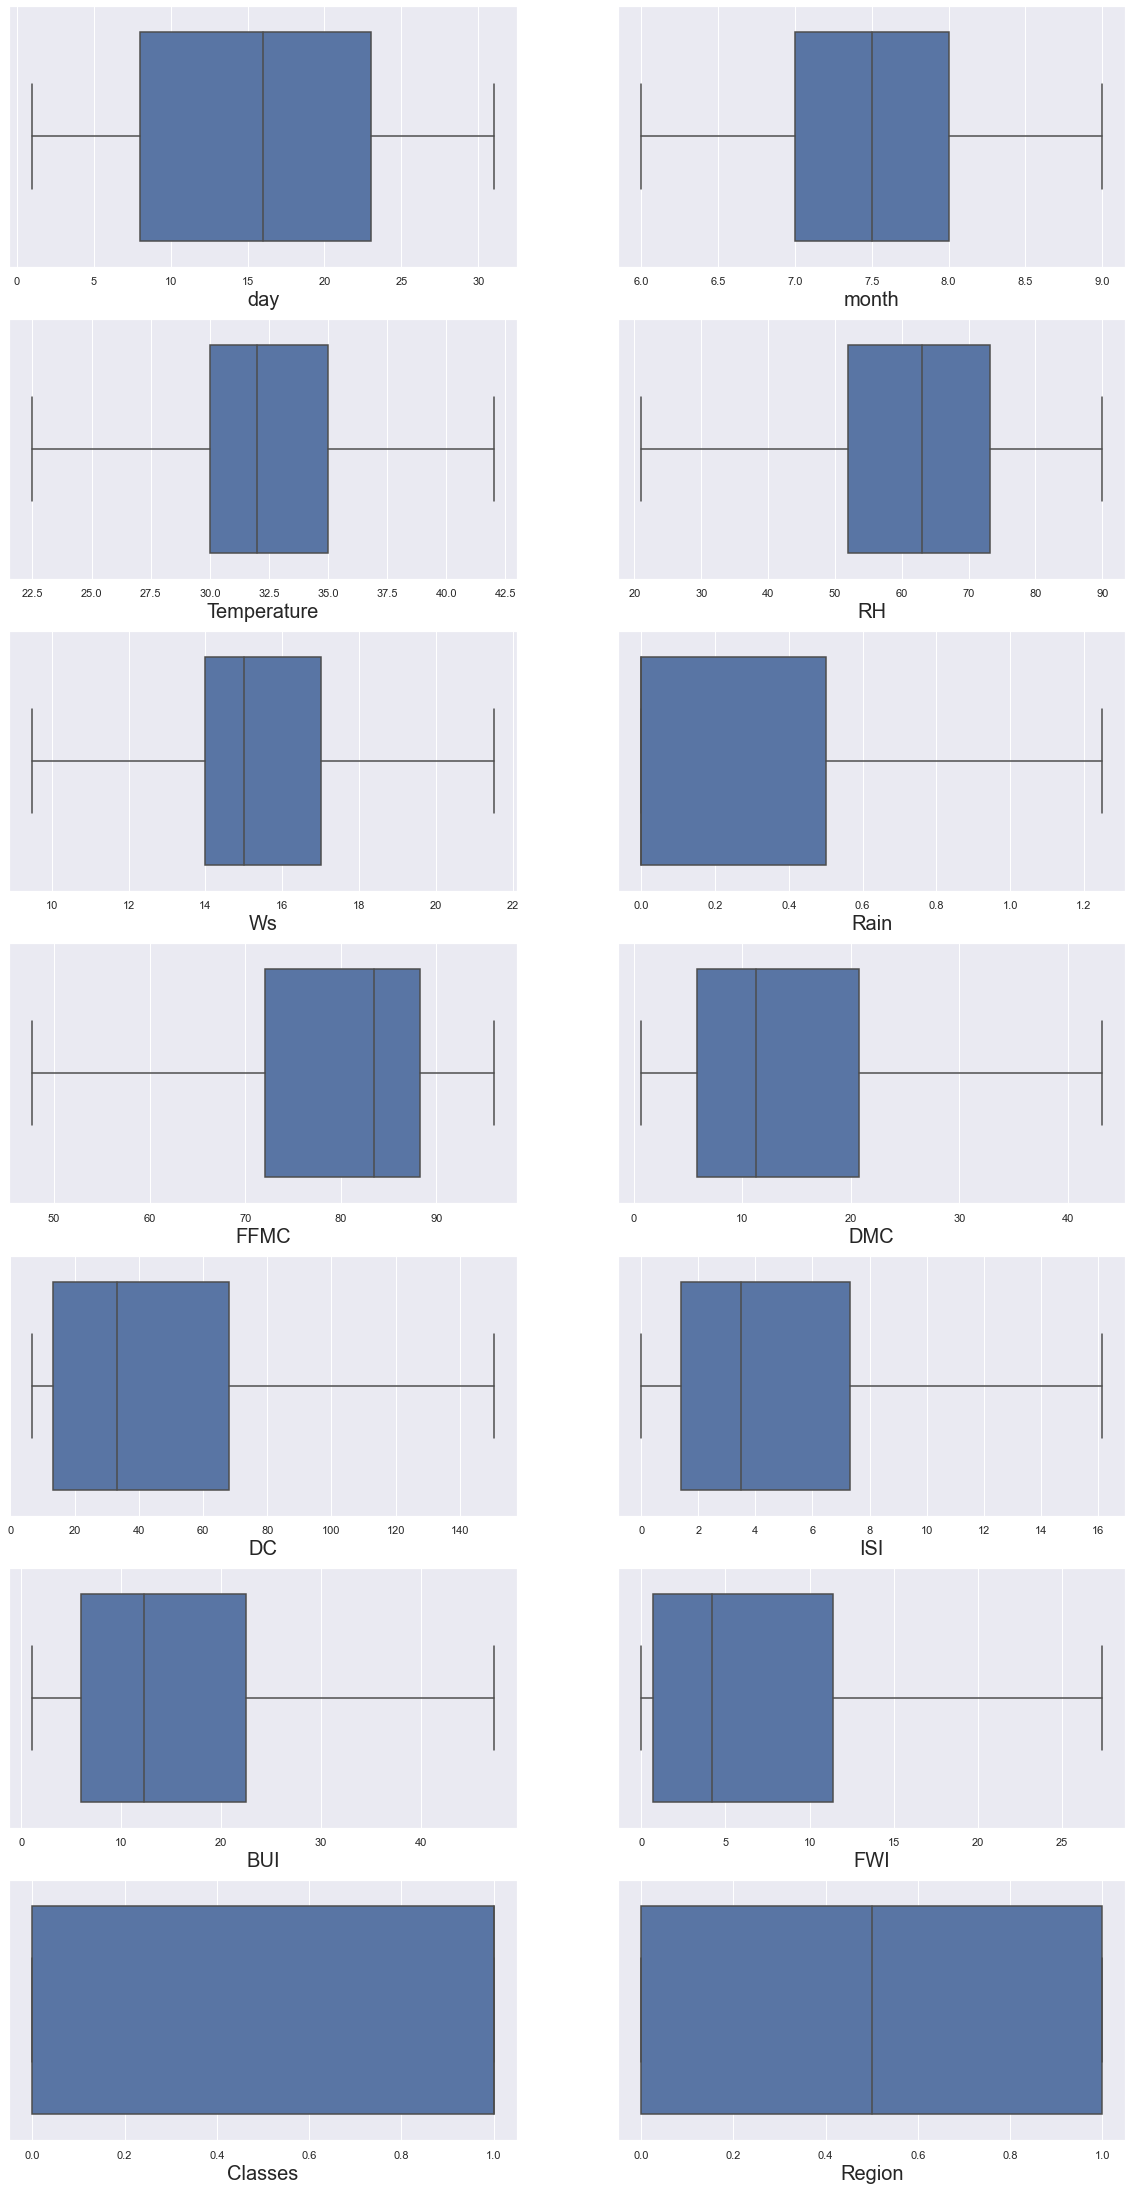

In [43]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### <span style='color:blue '> Observation </span>

* Outlier is not present in any of the features

## <span style='color:Green '> Creating Independent and Dependent Features  </span>


In [131]:
X = data.drop(columns = ['Classes'])
y = data['Classes']

### <span style='color:Green '> Independent Features  </span>


In [45]:
X

day  month  Temperature    RH    Ws  Rain     FFMC   DMC    DC  ISI  \
0     1.0    6.0         29.0  57.0  18.0  0.00  65.7000   3.4   7.6  1.3   
1     2.0    6.0         29.0  61.0  13.0  1.25  64.4000   4.1   7.6  1.0   
2     3.0    6.0         26.0  82.0  21.5  1.25  47.7375   2.5   7.1  0.3   
3     4.0    6.0         25.0  89.0  13.0  1.25  47.7375   1.3   6.9  0.0   
4     5.0    6.0         27.0  77.0  16.0  0.00  64.8000   3.0  14.2  1.2   
..    ...    ...          ...   ...   ...   ...      ...   ...   ...  ...   
239  26.0    9.0         30.0  65.0  14.0  0.00  85.4000  16.0  44.5  4.5   
240  27.0    9.0         28.0  87.0  15.0  1.25  47.7375   6.5   8.0  0.1   
241  28.0    9.0         27.0  87.0  21.5  0.50  47.7375   3.5   7.9  0.4   
242  29.0    9.0         24.0  54.0  18.0  0.10  79.7000   4.3  15.2  1.7   
243  30.0    9.0         24.0  64.0  15.0  0.20  67.3000   3.8  16.5  1.2   

      BUI  FWI  Region  
0     3.4  0.5     0.0  
1     3.9  0.4     0.0  
2     2.7  0.1     0.0  
3     1.7  0.0     0.0  
4     3.9  0.5     0.0  
..    ...  ...     ...  
239  16.9  6.5     1.0  
240   6.2  0.0     1.0  
241   3.4  0.2     1.0  
242   5.1  0.7     1.0  
243   4.8  0.5     1.0  

[244 rows x 13 columns]

## <span style='color:Green '> Dependent Features </span>


In [46]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    1.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: Classes, Length: 244, dtype: float64

# <span style='color:Green '> Visualizing the relationship between our independent and dependent Features </span>
 

In [47]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

## <span style='color:Green '> Importing sklearn libraries for Machine Learning  </span>


In [48]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## <span style='color:Green '> Train test split  </span>


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## <span style='color:Green '> Logistic Regression Model Training </span>


In [50]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [51]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [52]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

## <span style='color:Green '> Standardizing or Feature Selection  </span>


In [53]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [54]:
print(classifier_regressor.best_params_)  ## Best parameter

{'C': 50, 'max_iter': 200, 'penalty': 'l2'}


In [55]:
print(classifier_regressor.best_score_)  ## Best Score

0.9615615615615617


### <span style='color:Green '> Prediction </span>


In [56]:
y_pred = classifier_regressor.predict(X_test)

In [57]:
y_pred

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

### <span style='color:Green '> Acuracy score  </span>
 

In [58]:

from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.9672131147540983


### <span style='color:Green '> Classification Report  </span>


In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        26
         1.0       0.95      1.00      0.97        35

    accuracy                           0.97        61
   macro avg       0.97      0.96      0.97        61
weighted avg       0.97      0.97      0.97        61



## <span style='color:Green '> Performance Metrics </span>


### <span style='color:Green '>  Confusion Metrics </span>


In [60]:
conf_mat=confusion_matrix(y_pred,y_test)

In [61]:
conf_mat

array([[24,  2],
       [ 0, 35]], dtype=int64)

In [62]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

### <span style='color:Green '> Breaking down the formula for Accuracy </span>


In [63]:

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9672131147540983

### <span style='color:Green '> Precision </span>


In [64]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9230769230769231

### <span style='color:Green '> Recall  </span>


In [65]:

Recall = true_positive/(true_positive+false_negative)
Recall

1.0

### <span style='color:Green '>  F1 Score </span>


In [66]:

F1_Score = 2*(Recall * Precision) / (Recall + Precision)

F1_Score

0.9600000000000001

## <span style='color:Green '> Area Under Curve </span>


In [67]:
auc = roc_auc_score(y_test, y_pred)
auc

0.972972972972973

## <span style='color:Green '> Roc  </span>


In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

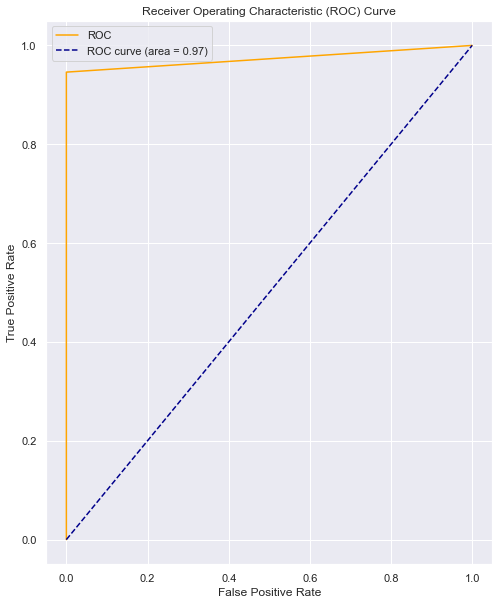

In [69]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## <span style='color:Green '> What is the significance of Roc curve and AUC? </span>

In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.

# <span style='color:Green '> Creating Imbalance dataset from the original balanced dataset  </span>


In [70]:
df.head()

day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0     0.0  
1        0     0.0  
2        0     0.0  
3        0     0.0  
4        0     0.0

In [71]:
df.shape

(244, 14)

In [72]:
### Creating imbalance
### 1. splitting data in 90:10 percent ratio using train test split
X1 = pd.DataFrame(df, columns = ['day', 'month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'])
y1=pd.DataFrame(df,columns = ['Classes'])

In [73]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)


In [74]:
## Both will have same shape
X_train_imb.shape, y_train_imb.shape

((219, 13), (219, 1))

### <span style='color:Green '> Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance  </span>



In [75]:
y_train_imb=y_train_imb.replace(0,1)
y_train_imb.head()

Classes
156        1
183        1
11         1
75         1
130        1

In [76]:
y_test_imb=y_test_imb.replace(1,0)
y_test_imb.head()


Classes
48         0
216        0
101        0
38         0
86         0

In [77]:
X_train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
156    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
183    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
130    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  
156  15.0     1.0  
183   0.8     1.0  
11    7.1     0.0  
75    6.3     0.0  
130   1.9     1.0

In [78]:
### Combining X_train_imb and y_train_imb
train_imb=X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()


day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
156    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
183    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
130    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  Classes  
156  15.0     1.0        1  
183   0.8     1.0        1  
11    7.1     0.0        1  
75    6.3     0.0        1  
130   1.9     1.0        1

In [79]:
### Combining X_test_imb and y_test_imb
test_imb=X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
48    19      7           35  59  17   0.0  88.1  12.0   52.8  7.7  18.2   
216    3      9           28  75  16   0.0  82.2   4.4   24.3  3.3   6.0   
101   10      9           33  73  12   1.8  59.9   2.2    8.9  0.7   2.7   
38     9      7           32  68  14   1.4  66.6   7.7    9.2  1.1   7.4   
86    26      8           31  78  18   0.0  85.8  45.6  190.6  4.7  57.1   

      FWI  Region  Classes  
48   10.9     0.0        0  
216   2.5     1.0        0  
101   0.3     0.0        0  
38    0.6     0.0        0  
86   13.7     0.0        0

In [80]:
### Checking the shape of imbalanced Data
train_imb.shape, test_imb.shape

((219, 14), (25, 14))

In [81]:
### Combining train_imb dataset and test_imb dataset into data_imb dataset 
df_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)
df_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   0.8   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

In [82]:
df_imb.shape

(244, 14)

### <span style='color:Green '> Checking the imbalancing </span>


In [83]:
df_imb.Classes.value_counts()

1    219
0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

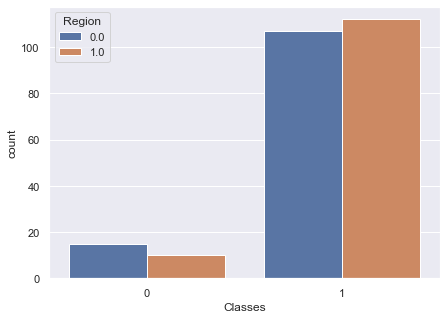

In [84]:
## 0 is 'Bejaia' and 1 is 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data=df_imb,x='Classes',hue='Region')

## <span style='color:Green '> Logistic Regression on imbalanced Dataset  </span>


In [85]:
df_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   0.8   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## <span style='color:Green '> Separating Independent and Dependent feature  </span>
 

In [86]:
X1 = df_imb.drop(columns = ['Classes'])
y1 = df_imb['Classes']

In [87]:
X1

day  month  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI  \
0      5      7           34  45  18   0.0  90.5  18.7   46.4  11.3  18.7   
1      1      8           38  52  14   0.0  78.3   4.4   10.5   2.0   4.4   
2     12      6           26  81  19   0.0  84.0  13.8   61.4   4.8  17.7   
3     15      8           36  55  13   0.3  82.4  15.6   92.5   3.7  22.0   
4      9      6           27  59  18   0.1  78.1   8.5   14.7   2.4   8.3   
..   ...    ...          ...  ..  ..   ...   ...   ...    ...   ...   ...   
239   26      8           33  37  16   0.0  92.2  61.3  167.2  13.1  64.0   
240    1      6           29  57  18   0.0  65.7   3.4    7.6   1.3   3.4   
241    2      9           28  67  19   0.0  75.4   2.9   16.3   2.0   4.0   
242   11      8           35  63  13   0.0  88.9  21.7   77.0   7.1  25.5   
243    9      8           39  43  12   0.0  91.7  16.5   30.9   9.6  16.4   

      FWI  Region  
0    15.0     1.0  
1     0.8     1.0  
2     7.1     0.0  
3     6.3     0.0  
4     1.9     1.0  
..    ...     ...  
239  30.3     1.0  
240   0.5     0.0  
241   0.8     1.0  
242  12.1     0.0  
243  12.7     1.0  

[244 rows x 13 columns]

In [88]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

### <span style='color:green '>9.2 Handling Imbalance dataset by Doing Upsampling</span>

In [92]:
### for upsampling 
from imblearn.combine import SMOTETomek

In [93]:
smk=SMOTETomek()
smk

SMOTETomek()

In [94]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [95]:
X_bal.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   0.8   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  
0     1.0  
1     1.0  
2     0.0  
3     0.0  
4     1.0

In [96]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [97]:
X_bal.shape,y_bal.shape

((418, 13), (418,))

In [98]:
## Creating Balanced data from imbalanced data
data_bal=X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   0.8   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## <span style='color:Green '> EDA on balanced Dataset  </span>
 

In [99]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          418 non-null    int64  
 1   month        418 non-null    int64  
 2   Temperature  418 non-null    int64  
 3   RH           418 non-null    int64  
 4   Ws           418 non-null    int64  
 5   Rain         418 non-null    float64
 6   FFMC         418 non-null    float64
 7   DMC          418 non-null    float64
 8   DC           418 non-null    float64
 9   ISI          418 non-null    float64
 10  BUI          418 non-null    float64
 11  FWI          418 non-null    float64
 12  Region       418 non-null    float64
 13  Classes      418 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 45.8 KB


## <span style='color:Green '> Statistical analysis on Balanced Dataset </span>


In [100]:
data_bal.describe().T

count       mean        std   min        25%        50%  \
day          418.0  14.696172   8.807618   1.0   7.000000  15.000000   
month        418.0   7.480861   1.015877   6.0   7.000000   7.000000   
Temperature  418.0  31.980861   3.214866  22.0  30.000000  32.000000   
RH           418.0  62.775120  13.849037  21.0  54.000000  64.000000   
Ws           418.0  15.521531   2.500986   6.0  14.000000  16.000000   
Rain         418.0   0.533750   1.568869   0.0   0.000000   0.000252   
FFMC         418.0  78.810110  12.492976  28.6  72.900000  83.163600   
DMC          418.0  15.231814  13.187586   0.7   4.571247  12.100000   
DC           418.0  53.835568  49.403601   6.9  15.731636  36.900000   
ISI          418.0   4.760849   3.813000   0.0   1.525000   3.782504   
BUI          418.0  17.693459  15.203004   1.1   5.800000  14.200000   
FWI          418.0   7.207544   7.206697   0.0   0.800000   4.865415   
Region       418.0   0.440332   0.455094   0.0   0.000000   0.206118   
Classes      418.0   0.500000   0.500599   0.0   0.000000   0.500000   

                   75%    max  
day          22.000000   31.0  
month         8.000000    9.0  
Temperature  34.000000   42.0  
RH           73.000000   90.0  
Ws           17.000000   29.0  
Rain          0.350145   16.8  
FFMC         87.695431   96.0  
DMC          21.038634   65.9  
DC           80.997993  220.4  
ISI           7.178022   19.0  
BUI          24.108046   68.0  
FWI          11.892403   31.1  
Region        1.000000    1.0  
Classes       1.000000    1.0

In [101]:
data_bal.corr()

day     month  Temperature        RH        Ws      Rain  \
day          1.000000 -0.108529     0.211355 -0.176460  0.124351 -0.063525   
month       -0.108529  1.000000    -0.146233  0.103669 -0.037592  0.015503   
Temperature  0.211355 -0.146233     1.000000 -0.664806 -0.225132 -0.259071   
RH          -0.176460  0.103669    -0.664806  1.000000  0.160422  0.171421   
Ws           0.124351 -0.037592    -0.225132  0.160422  1.000000  0.107410   
Rain        -0.063525  0.015503    -0.259071  0.171421  0.107410  1.000000   
FFMC         0.270341  0.016336     0.649440 -0.596665 -0.048108 -0.519199   
DMC          0.593453 -0.012879     0.436084 -0.353486  0.141288 -0.234785   
DC           0.625145  0.047628     0.354880 -0.231208  0.215898 -0.264828   
ISI          0.289943  0.038870     0.626105 -0.674726  0.099356 -0.320360   
BUI          0.618514  0.001046     0.419888 -0.317463  0.175456 -0.250724   
FWI          0.466327  0.037585     0.562470 -0.552254  0.141710 -0.291710   
Region      -0.005290  0.035952     0.210250 -0.365080 -0.110678 -0.014956   
Classes      0.138421 -0.044798     0.020861 -0.061225 -0.019154  0.202278   

                 FFMC       DMC        DC       ISI       BUI       FWI  \
day          0.270341  0.593453  0.625145  0.289943  0.618514  0.466327   
month        0.016336 -0.012879  0.047628  0.038870  0.001046  0.037585   
Temperature  0.649440  0.436084  0.354880  0.626105  0.419888  0.562470   
RH          -0.596665 -0.353486 -0.231208 -0.674726 -0.317463 -0.552254   
Ws          -0.048108  0.141288  0.215898  0.099356  0.175456  0.141710   
Rain        -0.519199 -0.234785 -0.264828 -0.320360 -0.250724 -0.291710   
FFMC         1.000000  0.583924  0.538637  0.762807  0.586998  0.708014   
DMC          0.583924  1.000000  0.903225  0.647206  0.986007  0.861909   
DC           0.538637  0.903225  1.000000  0.545965  0.956030  0.781887   
ISI          0.762807  0.647206  0.545965  1.000000  0.631386  0.913961   
BUI          0.586998  0.986007  0.956030  0.631386  1.000000  0.857568   
FWI          0.708014  0.861909  0.781887  0.913961  0.857568  1.000000   
Region       0.204390  0.153156 -0.074472  0.253879  0.063502  0.172984   
Classes     -0.113698 -0.090141 -0.154663 -0.024521 -0.123844 -0.074699   

               Region   Classes  
day         -0.005290  0.138421  
month        0.035952 -0.044798  
Temperature  0.210250  0.020861  
RH          -0.365080 -0.061225  
Ws          -0.110678 -0.019154  
Rain        -0.014956  0.202278  
FFMC         0.204390 -0.113698  
DMC          0.153156 -0.090141  
DC          -0.074472 -0.154663  
ISI          0.253879 -0.024521  
BUI          0.063502 -0.123844  
FWI          0.172984 -0.074699  
Region       1.000000  0.157585  
Classes      0.157585  1.000000

In [103]:
num_bal_col=[feature for feature in data_bal.columns if data_bal[feature].dtype != 'O']
num_bal_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes']

## <span style='color:Green '> Compairing the feature for Original and Balanced Dataset  </span>
 

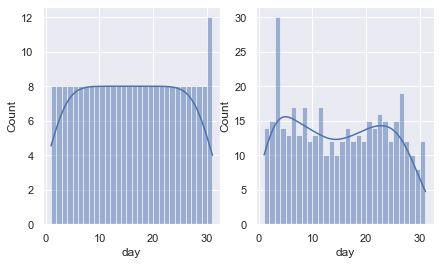

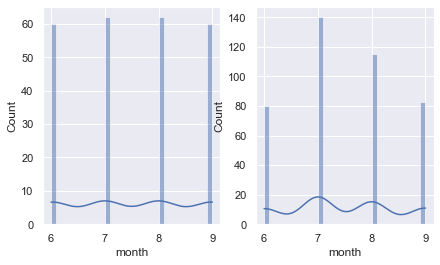

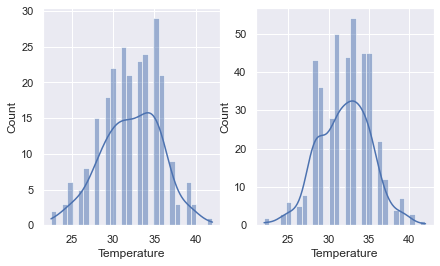

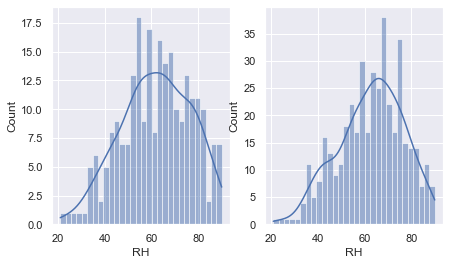

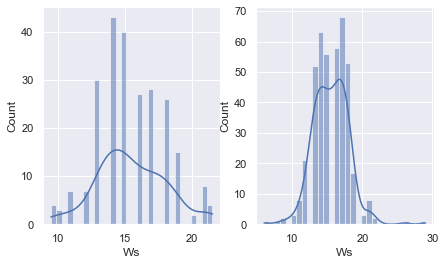

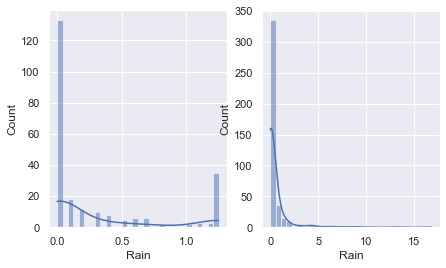

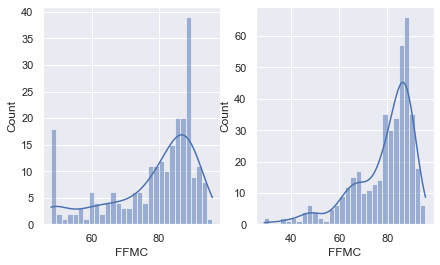

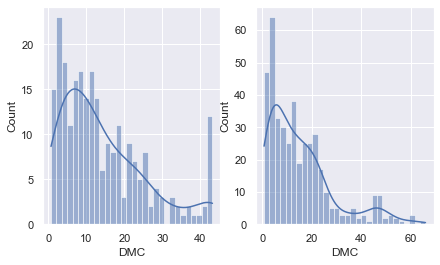

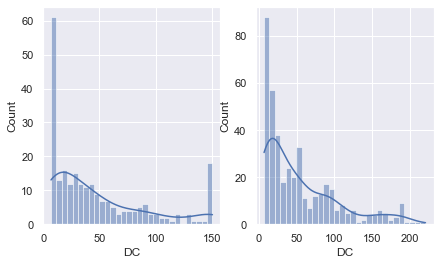

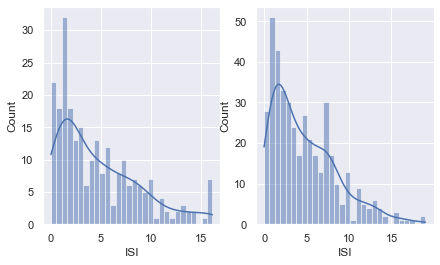

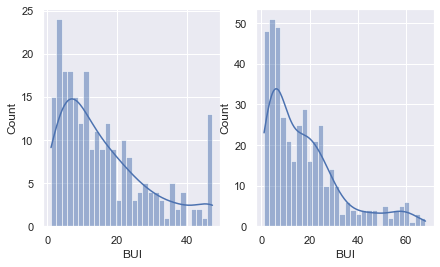

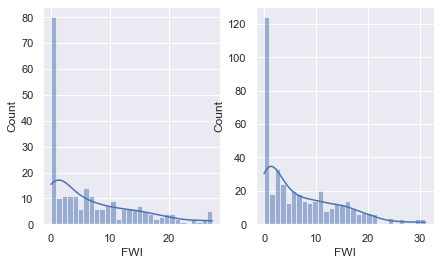

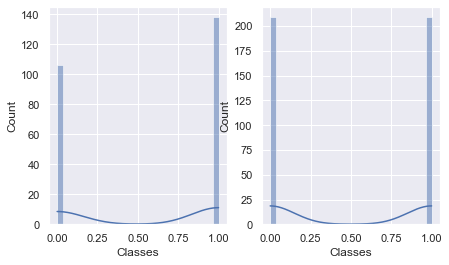

In [104]:
for i in num_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.histplot(data=data,x=i,kde=True,bins=30)
    
    
    plt.subplot(122)
    sns.histplot(data=data_bal,x=i,kde=True,bins=30)
    

# <span style='color:Green '> Checking the Outliers for Original and Balanced Dataset  </span>


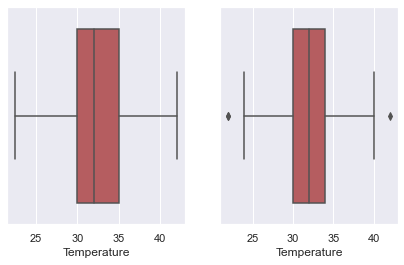

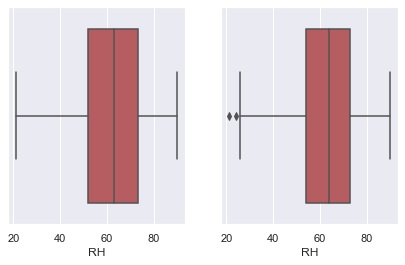

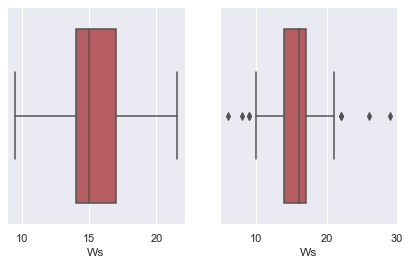

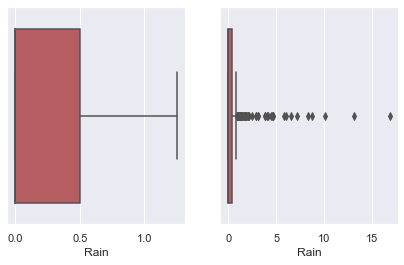

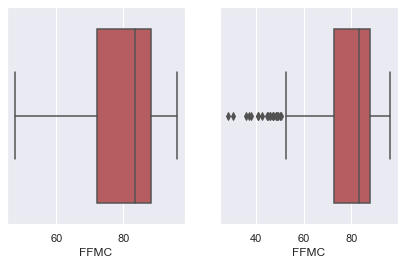

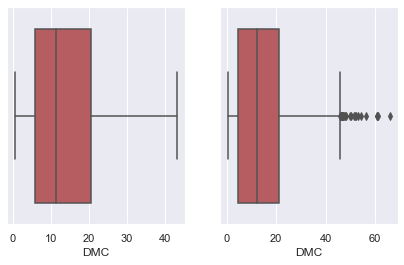

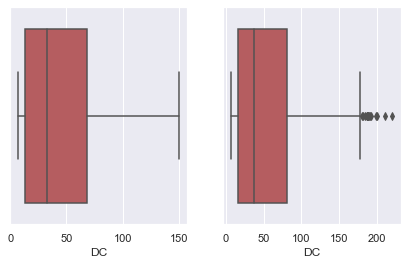

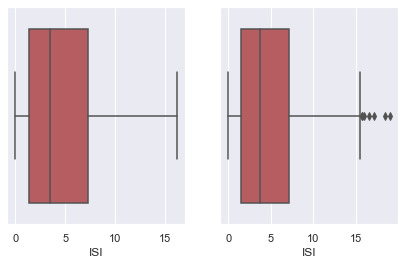

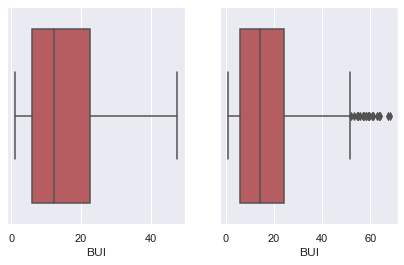

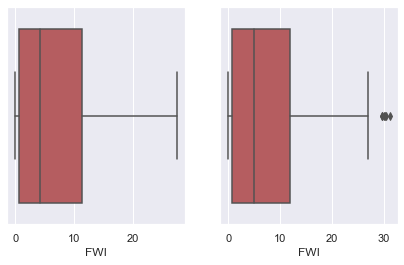

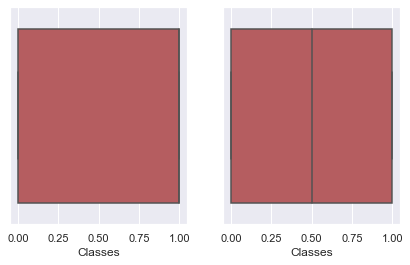

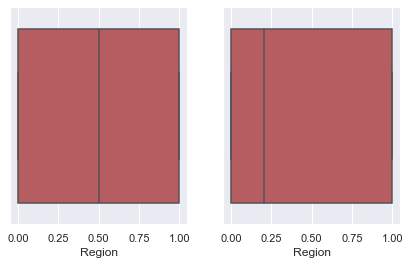

In [134]:
for i in num_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.boxplot(data=data,x=i,color='r')
    
    
    plt.subplot(122)
    sns.boxplot(data=data_bal,x=i,color='r')

## <span style='color:Green '> Test train Split  </span>
 

In [106]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_bal,y_bal,test_size=0.30,random_state=16)

In [107]:
X_train1

day  month  Temperature  RH  Ws      Rain       FFMC        DMC  \
7      2      7           33  48  16  0.000000  87.600000   7.900000   
246   21      7           33  63  16  0.891180  75.856370  21.051869   
405   17      8           35  54  17  0.000000  89.385340  20.049842   
351    4      9           28  76  15  0.000000  80.867762   4.185890   
333   28      6           32  48  13  0.377013  79.216508  18.640666   
..   ...    ...          ...  ..  ..       ...        ...        ...   
321   25      6           32  49  13  0.244161  81.575172  19.014230   
69    15      6           28  90  15  0.000000  66.800000   7.200000   
121    6      7           32  63  14  0.000000  87.000000  10.900000   
238   22      7           31  67  17  0.000000  87.749003  44.492435   
169   23      8           36  53  16  0.000000  89.500000  37.600000   

             DC        ISI        BUI        FWI    Region  
7     17.800000   6.800000   7.800000   6.400000  1.000000  
246   60.472667   2.644101  22.421379   4.322432  0.810163  
405  109.906082   9.623770  27.441362  15.982724  0.000000  
351   23.384087   3.050205   5.726415   2.262100  0.881050  
333   81.723792   2.142240  23.597840   3.765227  0.096266  
..          ...        ...        ...        ...       ...  
321   83.022636   3.112038  24.116421   5.426268  0.000000  
69    14.700000   1.200000   7.100000   0.600000  1.000000  
121   37.000000   5.600000  12.500000   6.800000  0.000000  
238   98.844223   7.532269  44.933071  16.785656  1.000000  
169  161.500000  10.400000  47.500000  22.300000  0.000000  

[292 rows x 13 columns]

In [108]:
X_test1

day  month  Temperature  RH  Ws      Rain       FFMC        DMC  \
307   20      8           35  37  17  0.000000  91.766036  23.042046   
310   23      7           31  71  17  0.000000  87.139229  46.492820   
414    8      7           37  42  12  0.098951  89.391152  16.170165   
163   28      7           33  57  16  0.000000  87.500000  15.700000   
178   12      6           27  58  17  0.000000  88.900000  21.300000   
..   ...    ...          ...  ..  ..       ...        ...        ...   
199    8      8           32  60  18  0.300000  77.100000  11.300000   
12    14      8           37  40  13  0.000000  91.900000  22.300000   
339   11      9           29  84  12  0.434024  68.323518   2.503550   
133   14      8           33  66  14  0.000000  87.000000  21.700000   
46     6      9           29  74  19  0.100000  75.800000   3.600000   

             DC        ISI        BUI        FWI    Region  
307   99.407826  13.164552  29.105524  20.747570  0.845013  
310  108.817720   6.664203  47.636112  16.021331  0.892820  
414   35.583663   7.851872  16.498951  10.589053  1.000000  
163   37.600000   6.700000  15.700000   9.000000  1.000000  
178   37.800000   8.700000  21.200000  12.900000  1.000000  
..          ...        ...        ...        ...       ...  
199   47.000000   2.200000  14.100000   2.600000  0.000000  
12    55.500000  10.800000  22.300000  15.700000  1.000000  
339   14.743341   1.079438   3.458876   0.451775  0.000000  
133   94.700000   5.700000  27.200000  10.600000  0.000000  
46    32.200000   2.100000   5.600000   0.900000  0.000000  

[126 rows x 13 columns]

In [109]:
y_train1

7      1
246    0
405    0
351    0
333    0
      ..
321    0
69     1
121    1
238    0
169    1
Name: Classes, Length: 292, dtype: int64

In [110]:
y_test1

307    0
310    0
414    0
163    1
178    1
      ..
199    1
12     1
339    0
133    1
46     1
Name: Classes, Length: 126, dtype: int64

## <span style='color:Green '> Logistic Regression Model  </span>
 

In [111]:
from sklearn.linear_model import LogisticRegression
classifier_bal=LogisticRegression()
classifier_bal

LogisticRegression()

In [112]:
from sklearn.model_selection import GridSearchCV
parameter_bal={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [113]:
classifier_regressor_bal=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

## <span style='color:Green '> Standarizing or Feature Scaling  </span>
 

In [114]:
classifier_regressor_bal.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [115]:
print(classifier_regressor_bal.best_params_)

{'C': 50, 'max_iter': 300, 'penalty': 'l2'}


In [116]:
print(classifier_regressor_bal.best_score_)

0.6436002337814143


## <span style='color:Green '> Prediction  </span>


In [117]:
y_bal_pred = classifier_regressor_bal.predict(X_test1)

In [118]:
y_bal_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

## <span style='color:Green '> Acurracy  </span>


In [119]:

from sklearn.metrics import accuracy_score,classification_report
bal_score=accuracy_score(y_bal_pred,y_test1)
print(bal_score)

0.6666666666666666


## <span style='color:Green '> Classification Report  </span>


In [120]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        63
           1       0.68      0.63      0.66        63

    accuracy                           0.67       126
   macro avg       0.67      0.67      0.67       126
weighted avg       0.67      0.67      0.67       126



## <span style='color:Green '> Performance Metrics  </span>


## <span style='color:Green '> Confusion Metrics </span>


In [121]:
conf_mat_bal=confusion_matrix(y_bal_pred,y_test1)

In [122]:
conf_mat_bal

array([[44, 19],
       [23, 40]], dtype=int64)

In [123]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]

## <span style='color:Green '> Precision </span>
 

In [124]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

0.6984126984126984

## <span style='color:Green '> Recall  </span>


In [125]:
bal_recall = true_positive/(true_positive+false_negative)
bal_recall

0.6567164179104478

## <span style='color:Green '> F1 score  </span>


In [126]:
F1_Score_bal = 2*(bal_recall * bal_Precision) / (bal_recall + bal_Precision)
F1_Score_bal

0.676923076923077

# <span style='color:Green '> Conclusion </span>


### <span style='color:Green '> Performance of Logistic Model on Original Dataset </span>


In [128]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        26
         1.0       0.95      1.00      0.97        35

    accuracy                           0.97        61
   macro avg       0.97      0.96      0.97        61
weighted avg       0.97      0.97      0.97        61



### <span style='color:Green '>  Performance of Logistic Model on Balanced Dataset which are created from imbalanced dataset  </span>

In [129]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        63
           1       0.68      0.63      0.66        63

    accuracy                           0.67       126
   macro avg       0.67      0.67      0.67       126
weighted avg       0.67      0.67      0.67       126



### <span style='color:blue'>Observation</span>

* It seems that model is good when we predict from original dataset

* It seems that model is very bad when we try to predict from balanced(created from an imbalanced dataset )

# <span style='color:red'>Thank You</span>
